In [1]:
# Install required packages
!pip install -q kaggle tensorflow numpy pandas matplotlib scikit-learn opencv-python

# optional: if you want to use kagglehub instead of kaggle
!pip install -q kagglehub


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sumn2u/garbage-classification-v2")
print("Path to dataset files:", path)

# If this returns a zip, locate and unzip it. Example:
!unzip -q {path} -d dataset
!ls dataset


100%|██████████| 744M/744M [00:04<00:00, 180MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/sumn2u/garbage-classification-v2/versions/8
unzip:  cannot find or open /root/.cache/kagglehub/datasets/sumn2u/garbage-classification-v2/versions/8, /root/.cache/kagglehub/datasets/sumn2u/garbage-classification-v2/versions/8.zip or /root/.cache/kagglehub/datasets/sumn2u/garbage-classification-v2/versions/8.ZIP.
ls: cannot access 'dataset': No such file or directory


In [4]:
import os

path = "/root/.cache/kagglehub/datasets/sumn2u/garbage-classification-v2/versions/8"
print(os.listdir(path))


['garbage-dataset']


In [7]:
DATA_DIR = os.path.join(path, "garbage-dataset")
print("Data directory:", DATA_DIR)
print(os.listdir(DATA_DIR))

Data directory: /root/.cache/kagglehub/datasets/sumn2u/garbage-classification-v2/versions/8/garbage-dataset
['clothes', 'cardboard', 'glass', 'biological', 'metal', 'battery', 'shoes', 'plastic', 'paper', 'trash']


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

IMG_SIZE = (128, 128)
BATCH_SIZE = 32

train_gen = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

print("Classes:", train_gen.class_indices)


Found 15813 images belonging to 10 classes.
Found 3949 images belonging to 10 classes.
Classes: {'battery': 0, 'biological': 1, 'cardboard': 2, 'clothes': 3, 'glass': 4, 'metal': 5, 'paper': 6, 'plastic': 7, 'shoes': 8, 'trash': 9}


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

num_classes = train_gen.num_classes

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,519,498 (24.87 MB)

 Trainable params: 6,519,050 (24.87 MB)

 Non-trainable params: 448 (1.75 KB)

In [10]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint_path = 'best_waste_cnn.h5'
callbacks = [
    ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, verbose=1),
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
]

history = model.fit(
    train_gen,
    epochs=20,
    validation_data=val_gen,
    callbacks=callbacks
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
495/495 ━━━━━━━━━━━━━━━━━━━━ 0s 968ms/step - accuracy: 0.2898 - loss: 3.8591
Epoch 1: val_accuracy improved from -inf to 0.32591, saving model to best_waste_cnn.h5


495/495 ━━━━━━━━━━━━━━━━━━━━ 516s 1s/step - accuracy: 0.2898 - loss: 3.8564 - val_accuracy: 0.3259 - val_loss: 2.2470
Epoch 2/20
495/495 ━━━━━━━━━━━━━━━━━━━━ 0s 970ms/step - accuracy: 0.3500 - loss: 1.9310
Epoch 2: val_accuracy did not improve from 0.32591
495/495 ━━━━━━━━━━━━━━━━━━━━ 515s 1s/step - accuracy: 0.3500 - loss: 1.9309 - val_accuracy: 0.3257 - val_loss: 2.9766
Epoch 3/20
495/495 ━━━━━━━━━━━━━━━━━━━━ 0s 961ms/step - accuracy: 0.3751 - loss: 1.8181
Epoch 3: val_accuracy improved from 0.32591 to 0.33933, saving model to best_waste_cnn.h5


495/495 ━━━━━━━━━━━━━━━━━━━━ 556s 1s/step - accuracy: 0.3751 - loss: 1.8181 - val_accuracy: 0.3393 - val_loss: 1.8099
Epoch 4/20
495/495 ━━━━━━━━━━━━━━━━━━━━ 0s 977ms/step - accuracy: 0.3833 - loss: 1.7676
Epoch 4: val_accuracy improved from 0.33933 to 0.41023, saving model to best_waste_cnn.h5


495/495 ━━━━━━━━━━━━━━━━━━━━ 518s 1s/step - accuracy: 0.3834 - loss: 1.7675 - val_accuracy: 0.4102 - val_loss: 1.7761
Epoch 5/20
495/495 ━━━━━━━━━━━━━━━━━━━━ 0s 959ms/step - accuracy: 0.4150 - loss: 1.7042
Epoch 5: val_accuracy improved from 0.41023 to 0.47683, saving model to best_waste_cnn.h5


495/495 ━━━━━━━━━━━━━━━━━━━━ 509s 1s/step - accuracy: 0.4150 - loss: 1.7042 - val_accuracy: 0.4768 - val_loss: 1.5915
Epoch 6/20
495/495 ━━━━━━━━━━━━━━━━━━━━ 0s 984ms/step - accuracy: 0.4180 - loss: 1.6608
Epoch 6: val_accuracy did not improve from 0.47683
495/495 ━━━━━━━━━━━━━━━━━━━━ 521s 1s/step - accuracy: 0.4180 - loss: 1.6608 - val_accuracy: 0.4388 - val_loss: 1.8671
Epoch 7/20
495/495 ━━━━━━━━━━━━━━━━━━━━ 0s 967ms/step - accuracy: 0.4197 - loss: 1.6589
Epoch 7: val_accuracy did not improve from 0.47683
495/495 ━━━━━━━━━━━━━━━━━━━━ 512s 1s/step - accuracy: 0.4197 - loss: 1.6588 - val_accuracy: 0.4558 - val_loss: 1.6398
Epoch 8/20
495/495 ━━━━━━━━━━━━━━━━━━━━ 0s 959ms/step - accuracy: 0.4453 - loss: 1.5936
Epoch 8: val_accuracy did not improve from 0.47683
495/495 ━━━━━━━━━━━━━━━━━━━━ 516s 1s/step - accuracy: 0.4453 - loss: 1.5936 - val_accuracy: 0.4295 - val_loss: 1.7445
Epoch 9/20
495/495 ━━━━━━━━━━━━━━━━━━━━ 0s 956ms/step - accuracy: 0.4520 - loss: 1.5667
Epoch 9: val_accuracy d

495/495 ━━━━━━━━━━━━━━━━━━━━ 513s 1s/step - accuracy: 0.4692 - loss: 1.5360 - val_accuracy: 0.4809 - val_loss: 1.5553
Epoch 11/20
495/495 ━━━━━━━━━━━━━━━━━━━━ 0s 967ms/step - accuracy: 0.4731 - loss: 1.5153
Epoch 11: val_accuracy improved from 0.48088 to 0.50823, saving model to best_waste_cnn.h5


495/495 ━━━━━━━━━━━━━━━━━━━━ 513s 1s/step - accuracy: 0.4731 - loss: 1.5153 - val_accuracy: 0.5082 - val_loss: 1.4642
Epoch 12/20
495/495 ━━━━━━━━━━━━━━━━━━━━ 0s 954ms/step - accuracy: 0.4882 - loss: 1.4848
Epoch 12: val_accuracy improved from 0.50823 to 0.56242, saving model to best_waste_cnn.h5


495/495 ━━━━━━━━━━━━━━━━━━━━ 506s 1s/step - accuracy: 0.4882 - loss: 1.4848 - val_accuracy: 0.5624 - val_loss: 1.3177
Epoch 13/20
495/495 ━━━━━━━━━━━━━━━━━━━━ 0s 944ms/step - accuracy: 0.4915 - loss: 1.4692
Epoch 13: val_accuracy did not improve from 0.56242
495/495 ━━━━━━━━━━━━━━━━━━━━ 501s 1s/step - accuracy: 0.4915 - loss: 1.4692 - val_accuracy: 0.4928 - val_loss: 1.6093
Epoch 14/20
495/495 ━━━━━━━━━━━━━━━━━━━━ 0s 947ms/step - accuracy: 0.5009 - loss: 1.4321
Epoch 14: val_accuracy did not improve from 0.56242
495/495 ━━━━━━━━━━━━━━━━━━━━ 502s 1s/step - accuracy: 0.5009 - loss: 1.4321 - val_accuracy: 0.5513 - val_loss: 1.3616
Epoch 15/20
495/495 ━━━━━━━━━━━━━━━━━━━━ 0s 945ms/step - accuracy: 0.5205 - loss: 1.3929
Epoch 15: val_accuracy improved from 0.56242 to 0.58040, saving model to best_waste_cnn.h5


495/495 ━━━━━━━━━━━━━━━━━━━━ 501s 1s/step - accuracy: 0.5205 - loss: 1.3929 - val_accuracy: 0.5804 - val_loss: 1.2706
Epoch 16/20
495/495 ━━━━━━━━━━━━━━━━━━━━ 0s 942ms/step - accuracy: 0.5300 - loss: 1.3718
Epoch 16: val_accuracy improved from 0.58040 to 0.61281, saving model to best_waste_cnn.h5


495/495 ━━━━━━━━━━━━━━━━━━━━ 507s 1s/step - accuracy: 0.5300 - loss: 1.3718 - val_accuracy: 0.6128 - val_loss: 1.1795
Epoch 17/20
495/495 ━━━━━━━━━━━━━━━━━━━━ 0s 942ms/step - accuracy: 0.5465 - loss: 1.3376
Epoch 17: val_accuracy did not improve from 0.61281
495/495 ━━━━━━━━━━━━━━━━━━━━ 500s 1s/step - accuracy: 0.5465 - loss: 1.3376 - val_accuracy: 0.5100 - val_loss: 1.4538
Epoch 18/20
495/495 ━━━━━━━━━━━━━━━━━━━━ 0s 938ms/step - accuracy: 0.5527 - loss: 1.3278
Epoch 18: val_accuracy did not improve from 0.61281
495/495 ━━━━━━━━━━━━━━━━━━━━ 498s 1s/step - accuracy: 0.5527 - loss: 1.3278 - val_accuracy: 0.5784 - val_loss: 1.2846
Epoch 19/20
495/495 ━━━━━━━━━━━━━━━━━━━━ 0s 944ms/step - accuracy: 0.5587 - loss: 1.2971
Epoch 19: val_accuracy did not improve from 0.61281
495/495 ━━━━━━━━━━━━━━━━━━━━ 501s 1s/step - accuracy: 0.5587 - loss: 1.2971 - val_accuracy: 0.6121 - val_loss: 1.1576
Epoch 20/20
495/495 ━━━━━━━━━━━━━━━━━━━━ 0s 963ms/step - accuracy: 0.5780 - loss: 1.2810
Epoch 20: val_ac

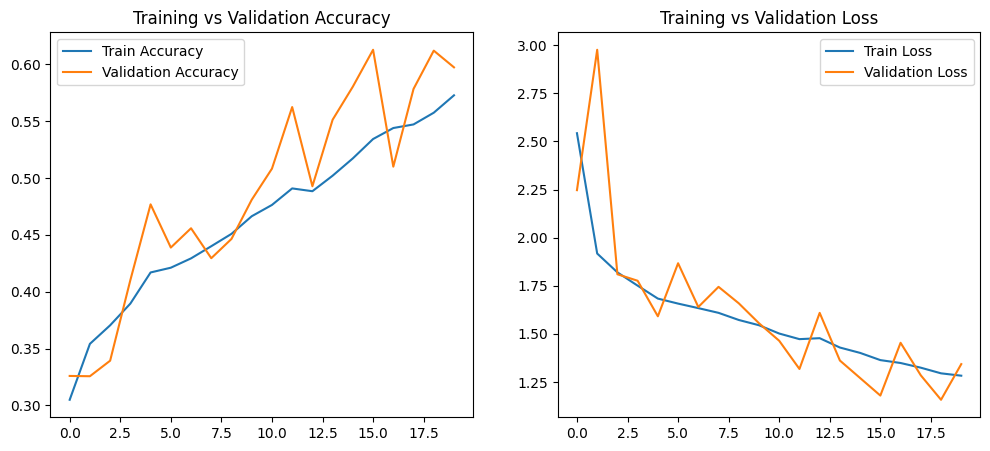

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()


In [12]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

val_loss, val_acc = model.evaluate(val_gen)
print(f"Validation Accuracy: {val_acc*100:.2f}%")

# Predict classes
predictions = model.predict(val_gen)
y_pred = np.argmax(predictions, axis=1)
y_true = val_gen.classes
labels = list(val_gen.class_indices.keys())

print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=labels))


124/124 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - accuracy: 0.6088 - loss: 1.1686
Validation Accuracy: 61.56%
124/124 ━━━━━━━━━━━━━━━━━━━━ 34s 270ms/step

Confusion Matrix:
[[  3   6  12  57  47   0  17  10  27   9]
 [  6   6  17  51  55   0  14  18  25   7]
 [  9  16  33  92  82   0  31  29  58  15]
 [ 26  40  94 270 295   1  61  78 156  44]
 [ 17  25  41 161 167   1  41  46  85  28]
 [  3   9  13  48  66   0  12  17  30   6]
 [ 11  16  33  90  70   0  40  18  51   7]
 [ 16  19  34  99  96   2  28  29  58  15]
 [  9  17  23 112 103   0  30  31  59  11]
 [  6  10  17  49  55   0  12  16  19   5]]

Classification Report:
              precision    recall  f1-score   support

     battery       0.03      0.02      0.02       188
  biological       0.04      0.03      0.03       199
   cardboard       0.10      0.09      0.10       365
     clothes       0.26      0.25      0.26      1065
       glass       0.16      0.27      0.20       612
       metal       0.00      0.00      0.00       2

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os


In [16]:
model = tf.keras.models.load_model('best_waste_cnn.h5')
print("✅ Model loaded successfully!")

✅ Model loaded successfully!


In [17]:
labels = list(train_gen.class_indices.keys())
print("Class Labels:", labels)


Class Labels: ['battery', 'biological', 'cardboard', 'clothes', 'glass', 'metal', 'paper', 'plastic', 'shoes', 'trash']


In [22]:
from google.colab import files
uploaded = files.upload()


Saving battery_4.jpg to battery_4.jpg


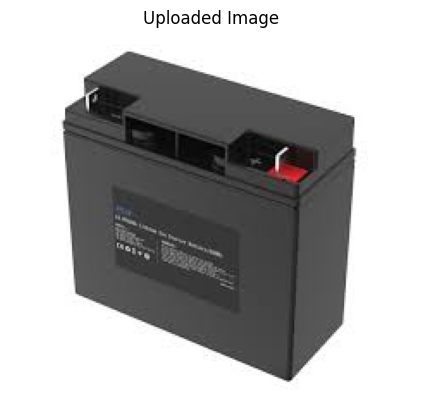

In [23]:
image_path = list(uploaded.keys())[0]

img = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # normalize

plt.imshow(tf.keras.preprocessing.image.load_img(image_path))
plt.axis('off')
plt.title("Uploaded Image")
plt.show()


In [24]:
pred = model.predict(img_array)
predicted_class = np.argmax(pred, axis=1)[0]
print(f"Predicted Class Index: {predicted_class}")
print(f"Predicted Label: {labels[predicted_class]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Class Index: 0
Predicted Label: battery
